In [1]:
import tensorflow as tf
from copy import  deepcopy
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

C:\Tools\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

In [3]:
from model_simple import Model

In [4]:
def mnist_imshow(img):
    plt.imshow(img.reshape([28, 28]), cmap='gray')
    plt.axis('off')

# return a new mnist dataset w/ pixels randomly permuted
def permute_mnist(mnist):
    perm_inds = list(range(mnist.train.images.shape[1]))
#     print (range(mnist.train.images.shape[1]))
    np.random.shuffle(perm_inds)
    mnist2 = deepcopy(mnist)
    sets = ["train", "validation", "test"]
    for set_name in sets:
        this_set = getattr(mnist2, set_name) # shallow copy
#         print (np.array([this_set.images[:,i] for i in [1,2,3,4]]).shape)
        #dafaq is with ._images, where did this shit come from, but okay moving on with lyf 
        this_set._images = np.transpose(np.array([this_set.images[:,c] for c in perm_inds]))
    return mnist2

In [5]:
def train_model(model, train_set, test_sets, num_iters, test_freq):
    test_accs = np.zeros((len(test_sets), num_iters // test_freq))
    
    for idx in range(num_iters):
        
        train_batch = train_set.train.next_batch(100)
        feed_dict = {x: train_batch[0], y_: train_batch[1]}
        model.train_step.run(feed_dict=feed_dict)
        
        if idx % test_freq == 0:
            
            for t, test_set in enumerate(test_sets):
                feed_dict = {x: test_set.test.images, y_:test_set.test.labels}
                accuracy = model.accuracy.eval(feed_dict=feed_dict)
                test_accs[t, idx // test_freq] = accuracy
            print(f'\rIteration {idx+1}/{num_iters}', end='')
    print(f'\rTraining  {num_iters}/{num_iters} done.')
    return test_accs

In [6]:
def calc_accs(models, params, data_sets, iters_per_dataset, test_freq, session):
    k = iters_per_dataset // test_freq
    ds_num = len(data_sets)
    accs = np.zeros((len(models), len(data_sets), len(data_sets) * k))
    for m_idx, model in enumerate(models):
        test_sets = []
        for d_idx, data_set in enumerate(data_sets):
            test_sets.append(data_set)
            model.open_lesson(params[m_idx][0], params[m_idx][1], params[m_idx][2], params[m_idx][3])
            cur_accs = train_model(model, data_set, test_sets, iters_per_dataset, test_freq)
            img_set = data_set.validation.images
            idxs = [np.random.randint(img_set.shape[0]) for i in range(200)]
            test_set = img_set[idxs]
            model.close_lesson(test_set, session)
            for t_idx in range(ds_num):
                if t_idx < len(test_sets):
                    acc_arr = cur_accs[t_idx]
                else:
                    acc_arr = [None]*k
                for idx in range(k):
                    accs[m_idx][t_idx][k*d_idx+idx] = acc_arr[idx]
            accs[m_idx][t_idx][0] = 0.0
    return accs

In [7]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
sess = tf.InteractiveSession()

# define input and target placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
mnist1 = mnist
mnist2 = permute_mnist(mnist) # get second mnist
mnist3 = permute_mnist(mnist) # get third mnist

In [9]:
accs = []
for i in range(10):
    # instantiate new model
    model1 = Model(x, y_) # simple 2-layer network
    model2 = Model(x, y_) # simple 2-layer network
    model3 = Model(x, y_) # simple 2-layer network
    model4 = Model(x, y_) # simple 2-layer network
    model5 = Model(x, y_) # simple 2-layer network
    sess.run(tf.global_variables_initializer())

    models=[model1, model2, model3, model4, model5]
    data_sets=[mnist1, mnist2, mnist3]
    params = [(Model.SGD, Model.SIGNAL, .1, 0.), 
              (Model.EWC, Model.SIGNAL, .1, 1.), (Model.EWC, Model.FISHER, .1, 15.), 
              (Model.WVA, Model.SIGNAL, .1, 350.), (Model.WVA, Model.FISHER, .1, 5250.)]

    idxs = np.array(range(1, 1500*len(data_sets)+1, 20))
    accs.append(calc_accs(models, params, data_sets, 1500, 20, sess))

Instructions for updating:
Use `tf.random.categorical` instead.
Instructions for updating:
Use `tf.cast` instead.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Training  1500/1500 done.
Tr

In [10]:
accs_arr = np.array(accs)

In [11]:
np.save('pic1_data.npy', accs_arr)

In [ ]:
accs_arr = np.load('pic1_data.npy')

In [14]:
accs = accs_arr.mean(axis=0)

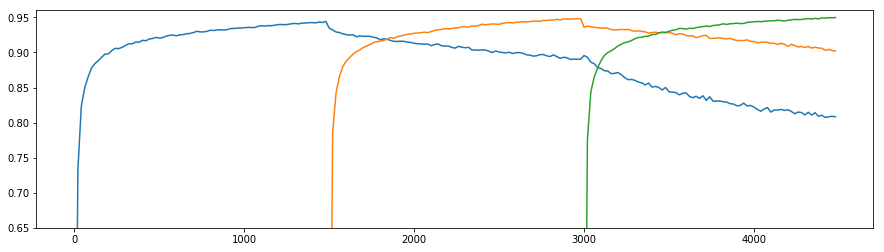

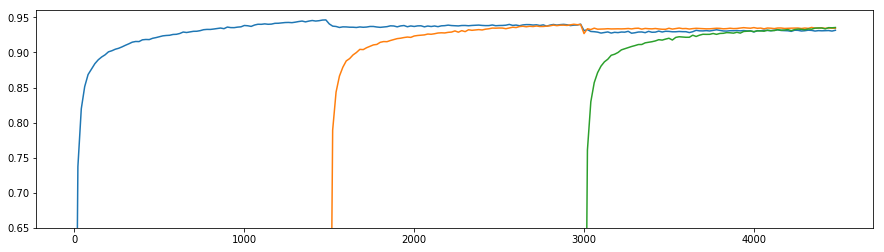

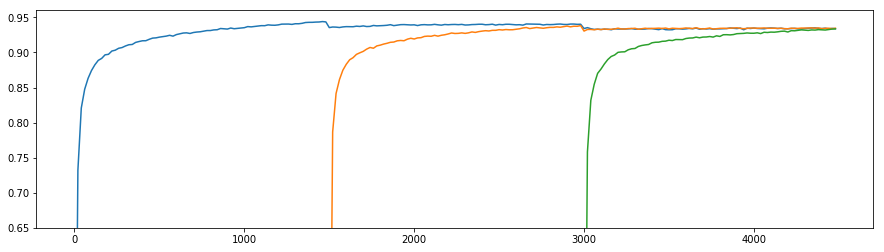

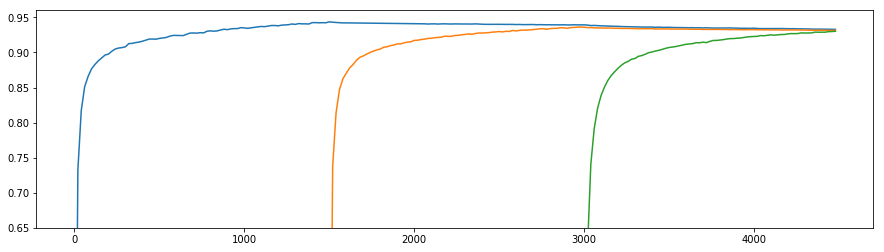

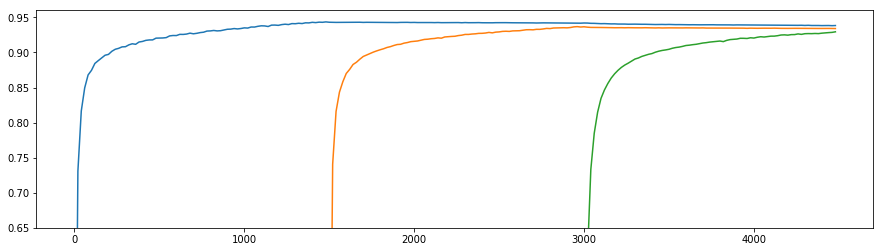

In [15]:
for i in range(len(models)):
    plt.figure(figsize = (15, 4))
    plt.ylim(0.65, 0.96)
    plt.plot(idxs, accs[i,0])
    plt.plot(idxs, accs[i,1])
    plt.plot(idxs, accs[i,2])
    plt.show()

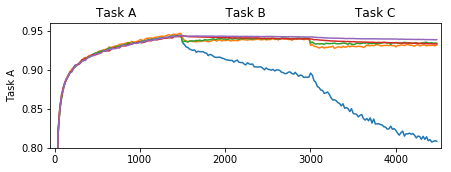

In [47]:
plt.figure(figsize = (7, 2.3))
plt.ylim(0.80, 0.96)
plt.title('Task A                       Task B                       Task C')
plt.ylabel('Task A')
plt.xlim(idxs[0]-50, idxs[-1]+50)
plt.plot(idxs, accs[0,0], label='SGD')
plt.plot(idxs, accs[1,0], label='EWC-S')
plt.plot(idxs, accs[2,0], label='EWC-F')
plt.plot(idxs, accs[3,0], label='WVA-S')
plt.plot(idxs, accs[4,0], label='WVA-F')
#plt.legend()
plt.show()

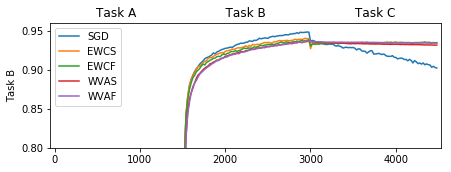

In [45]:
plt.figure(figsize = (7, 2.3))
plt.ylim(0.80, 0.96)
plt.title('Task A                       Task B                       Task C')
plt.ylabel('Task B')
plt.xlim(idxs[0]-50, idxs[-1]+50)
plt.plot(idxs, accs[0,1], label='SGD')
plt.plot(idxs, accs[1,1], label='EWCS')
plt.plot(idxs, accs[2,1], label='EWCF')
plt.plot(idxs, accs[3,1], label='WVAS')
plt.plot(idxs, accs[4,1], label='WVAF')
plt.legend()
plt.show()

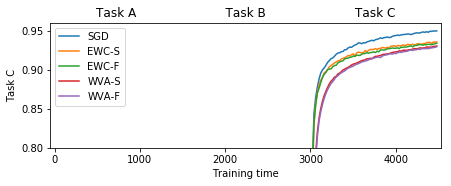

In [48]:
plt.figure(figsize = (7, 2.3))
plt.ylim(0.80, 0.96)
plt.title('Task A                       Task B                       Task C')
plt.ylabel('Task C')
plt.xlabel('Training time')
plt.xlim(idxs[0]-50, idxs[-1]+50)
plt.plot(idxs, accs[0,2], label='SGD')
plt.plot(idxs, accs[1,2], label='EWC-S')
plt.plot(idxs, accs[2,2], label='EWC-F')
plt.plot(idxs, accs[3,2], label='WVA-S')
plt.plot(idxs, accs[4,2], label='WVA-F')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (15, 4))
plt.ylim(0.65, 0.96)
plt.xlim(idxs[0]-50, idxs[-1]+50)
plt.plot(idxs, accs[0,3], label='SGD')
plt.plot(idxs, accs[1,3], label='EWCS')
plt.plot(idxs, accs[2,3], label='EWCF')
plt.plot(idxs, accs[3,3], label='WVAS')
plt.plot(idxs, accs[4,3], label='WVAF')
plt.legend()
plt.show()